In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv('Resources/model_3.csv')
data

,Unnamed: 0,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita,concentration
0,1,1752,3,0,0,3,0,0,NaN,277.23
1,12,1763,3,0,0,3,0,0,NaN,277.16
2,13,1764,3,0,0,3,0,0,NaN,276.40
3,22,1773,4,0,0,4,0,0,NaN,277.86
4,28,1779,4,0,0,4,0,0,NaN,280.24
...,...,...,...,...,...,...,...,...,...,...
136,255,2006,8370,1525,3089,3339,356,61,1.27,381.90
137,256,2007,8566,1572,3081,3464,382,68,1.28,383.79
138,257,2008,8783,1631,3122,3571,388,71,1.30,385.60
139,258,2009,8740,1585,3056,3620,413,66,1.28,387.43


In [4]:
del data['Unnamed: 0']
del data['Total']
del data['Per Capita']


In [5]:
data

,Year,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,concentration
0,1752,0,0,3,0,0,277.23
1,1763,0,0,3,0,0,277.16
2,1764,0,0,3,0,0,276.40
3,1773,0,0,4,0,0,277.86
4,1779,0,0,4,0,0,280.24
...,...,...,...,...,...,...,...
136,2006,1525,3089,3339,356,61,381.90
137,2007,1572,3081,3464,382,68,383.79
138,2008,1631,3122,3571,388,71,385.60
139,2009,1585,3056,3620,413,66,387.43


In [6]:
X=data.drop(columns=['concentration', 'Year'])
y=data.concentration


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9871632365339449
Testing Score: 0.991831779528276


In [10]:
future=pd.read_csv('Resources/MasterProjected.csv')
bad=pd.read_csv('Resources/master_OneFifth_increase.csv')
good=pd.read_csv('Resources/master_OneFifth_drop.csv')

In [11]:
del future['Unnamed: 0']
del bad['Unnamed: 0']
del good['Unnamed: 0']



In [12]:
X=future.drop(columns=['Year'])
X1=bad.drop(columns=['Year'])
X2=good.drop(columns=['Year'])

concentration=model.predict(X)
concentrationBad=model.predict(X1)
concentrationGood=model.predict(X2)



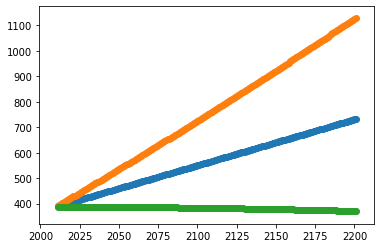

In [13]:
plt.scatter(future.Year,concentration)
plt.scatter(future.Year,concentrationBad)
plt.scatter(future.Year,concentrationGood)
plt.show()

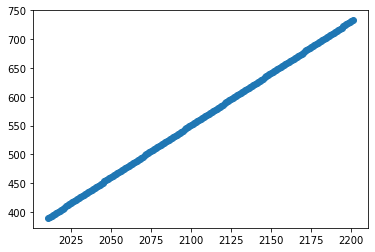

In [14]:
plt.scatter(future.Year,concentration)


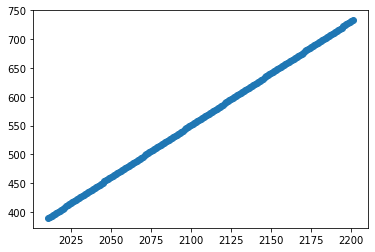

In [15]:
plt.scatter(future.Year,concentration)

In [16]:
projected_conc=pd.DataFrame({'Year':future.Year,
                            'easing':concentrationGood,
                            'maintaining':concentration,
                            'increase':concentrationBad})

In [19]:
projected_conc.to_csv('Resources/chartProjections.csv', index=False)


In [25]:
dict_list=projected_conc.to_dict('records')

In [26]:
dict_list

[{'Year': 2011,
  'easing': 387.8309083596631,
  'maintaining': 389.64707072661383,
  'increase': 391.4632330935646},
 {'Year': 2012,
  'easing': 387.8200764096737,
  'maintaining': 391.4532988389468,
  'increase': 395.0883383337012},
 {'Year': 2013,
  'easing': 387.8083476644914,
  'maintaining': 393.2595269512799,
  'increase': 398.716160143853},
 {'Year': 2014,
  'easing': 387.79572302361925,
  'maintaining': 395.0657550636129,
  'increase': 402.34670033431576},
 {'Year': 2015,
  'easing': 387.78220338588534,
  'maintaining': 396.87198317594573,
  'increase': 405.979960716513},
 {'Year': 2016,
  'easing': 387.76778964944276,
  'maintaining': 398.67821128827876,
  'increase': 409.61594310300137},
 {'Year': 2017,
  'easing': 387.75248271176997,
  'maintaining': 400.4844394006118,
  'increase': 413.25464930747},
 {'Year': 2018,
  'easing': 387.73628346967115,
  'maintaining': 402.2906675129448,
  'increase': 416.8960811447414},
 {'Year': 2019,
  'easing': 387.7191928192784,
  'maintain

In [27]:
hist=pd.read_csv('Resources/co2_concentration.csv')
hist=hist.to_dict('records')
hist

[{'Year': -803719, 'CO2_concentrations': 207.29},
 {'Year': -803182, 'CO2_concentrations': 202.23},
 {'Year': -802573, 'CO2_concentrations': 204.86},
 {'Year': -802060, 'CO2_concentrations': 207.5},
 {'Year': -801975, 'CO2_concentrations': 202.92},
 {'Year': -801759, 'CO2_concentrations': 202.65},
 {'Year': -800922, 'CO2_concentrations': 198.66},
 {'Year': -799286, 'CO2_concentrations': 198.68},
 {'Year': -796731, 'CO2_concentrations': 200.49},
 {'Year': -795429, 'CO2_concentrations': 197.91},
 {'Year': -794903, 'CO2_concentrations': 198.79},
 {'Year': -793737, 'CO2_concentrations': 204.62},
 {'Year': -793172, 'CO2_concentrations': 208.79},
 {'Year': -791903, 'CO2_concentrations': 218.39},
 {'Year': -791569, 'CO2_concentrations': 213.36},
 {'Year': -790667, 'CO2_concentrations': 214.45},
 {'Year': -790081, 'CO2_concentrations': 224.69},
 {'Year': -789107, 'CO2_concentrations': 230.55},
 {'Year': -788689, 'CO2_concentrations': 227.38},
 {'Year': -788003, 'CO2_concentrations': 235.49},
 

In [32]:
for x in range(len(hist)):
    dict_list.append(hist[x])

In [39]:
dict_list[0]['CO2_concentrations']=''

In [40]:
import csv

In [42]:
with open('Resources/DivergingData.csv', 'w', encoding='utf8', newline='') as output_file:
    fc = csv.DictWriter(output_file, 
                        fieldnames=dict_list[0].keys(),

                       )
    fc.writeheader()
    fc.writerows(dict_list)

In [54]:
df=pd.read_csv('Resources/DivergingData.csv')
df.dtypes


Year                    int64
easing                float64
maintaining           float64
increase              float64
CO2_concentrations    float64
dtype: object

In [55]:
# df['Year']=int(df['Year'])
df=df.sort_values(by=['Year'])
df

,Year,easing,maintaining,increase,CO2_concentrations
191,-803719,NaN,NaN,NaN,207.29
192,-803182,NaN,NaN,NaN,202.23
193,-802573,NaN,NaN,NaN,204.86
194,-802060,NaN,NaN,NaN,207.50
195,-801975,NaN,NaN,NaN,202.92
...,...,...,...,...,...
186,2197,371.304171,725.605500,1114.437512,NaN
187,2198,371.141320,727.411728,1118.600272,NaN
188,2199,370.977728,729.217956,1122.766106,NaN
189,2200,370.813396,731.024184,1126.935016,NaN


In [56]:
df.to_csv('Resources/DivergingData.csv', index=False)